# Ad CTR Optimization using Thompson Sampling

**Scenario**: We receive a dataset with users in the rows and ads in the columns. A `1` denotes that the user clicked on that particular and `0` denotes otherwise.

**Goal**: Find the ad with the highest clickthrough rate (CTR).

**Results**: 

Using Thompson sampling, the 5th ad was found to have the highest clickthrough rate over 10,000 rounds. This is the same result we got when we used the upper confidence bound algorithm. This result persists through to 200 rounds. For this example, Thompson sampling is computationally more efficient than the UCB algorithm.

>**Note**: Recall that when we used the upper confidence bound, the 5th ad was found to have the highest clickthrough rate over 10,000 rounds. This result remained unchanged when decreasing the number of rounds to 1,000. It was around 500 rounds where the 8th ad presented itself to have the higher clickthrough rate but only slightly over the 5th ad. 

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range (0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

## Visualizing the results - Histogram

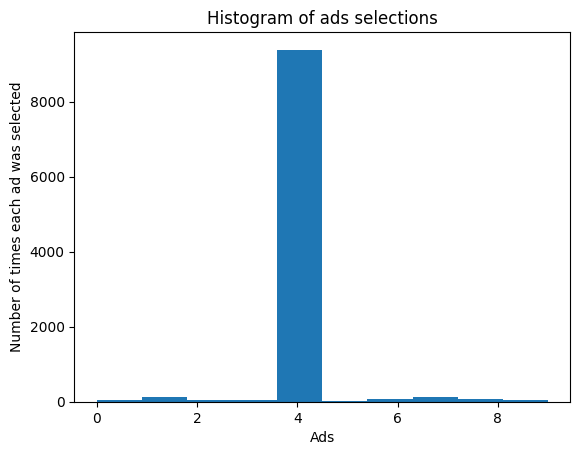

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()